# How blockchain developer interest has changed over time

This is an interactive [Jupyter Notebook](https://tradingstrategy.ai/glossary/jupyter-notebook) that researches the popularity and features of different blockchain software development ecosystems. The research is done by analysing questions and answers data on the world's number one programmer forum, StackOverflow.

For any future updates, [subscribe to the newsletter](https://tradingstrategy.ai/community) or [follow us on Twitter, LinkedIn and Telegram](https://tradingstrategy.ai/community).

For any questions, [come to Trading Strategy Discord](https://discord.com/invite/en8tW6MDtw).

## Executive summary

The results of this research help to understand the blockchain developer landscape better, businesses to make decisions on blockchain adoption and blockchain communities to benchmark their community activity among their peers.

- This study focuses only on the popularity of software development aspects of blockchains. We do not examine matters like end-user adoption, fair value of cryptocurrencies and where these technologies add value.
- Blockchain development popularity is in decline based on StackOverflow data.
- [Ethereum Virtual Machine](https://tradingstrategy.ai/glossary/evm)-based blockchains dominate the software development, as expected.  Ethereum and [EVM-compatible blockchains](https://tradingstrategy.ai/glossary/evm-compatible) cannot be differetiate, as they are more or less [clones](https://tradingstrategy.ai/glossary/clone) of each other and thus any question to Ethereum could be also a question of Binance Smart Chain, Polygon and others.
- Solana, the first runner-up as an independent ecosystem, is ~1/6th of EVM's popularity.
The next runner-ups are NEAR protocol and Bitcoin, though Bitcoin development interest peaked already in 2014.
- We see two waves of developer interest following the cryptocurrency bull markets of 2018 and 2022. The blockchain development activity has returned to the same level it was before the 2020 cryptocurrency market bull run.
- Bitcoin development interest has not changed over a decade - not dead, but nothing happening
- There are various alternative blockchain technologies that do not have taken off
  in the development popularity over the years.
- Private blockchains, namely Hyperledger, peaked in 2018. In fact, Hyperledger temporarily surpassed Ethereum in popularity. But since then, Hyperledger has been in decline and is mostly irrelevant today. 
- We see some positive, and somewhat surprising results, like the activation of the Hedera Hashgraph and WalletConnect communities.
- Some of the latest technologies like Aptos and Sui using Move programming language, or Radix DLT with Scrypto programming language, are too fresh to have meaningful fingerprints in the data.
- Very few people are developing on Bitcoin and this has been the state of Bitcoin development for the past decade.

The data is not fully representative, as it focuses on a single forum, StackOverflow, of which popularity has declined over the years. [The StackOverlow datasets end in May 2023](https://news.ycombinator.com/item?id=37360026) and have not been refreshed anymore. **As StackOverflow stopped publishing data, and the dataset is getting stale, this research is more useful to examine history, not to make future predictions.**

For data researchers, this notebook also serves as a best practices example on using [Python](https://tradingstrategy.ai/glossary/python), [Jupyter](https://tradingstrategy.ai/glossary/jupyter-notebook), [Pandas](https://tradingstrategy.ai/glossary/pandas) and [Poetry](https://python-poetry.org/).

## Preface

This little research notebook was created to answer questions like "Is blockchain development dead" or  "Does there exist viable blockchain development outside EVM today".

- The research was done out of curiosity to see if "blockchain and cryptocurrencies are dead" and have facts to direct this discussion. But we need to be more fine-grained in our discussion: is it all blockchains that are dead, are some more dead than others, how dead we are historically?
- Also, there was a recent incident of the founder of MakerDAO, one of the oldest Ethereum projects, [praising Solana](https://decrypt.co/154802/rune-christensen-makerdao-solana-ethereum-newchain), the second most popular alternative for [Ethereum Virtual Machine](https://tradingstrategy.ai/glossary/evm) ecosystem.
- [As MakerDAO is one of the foundational protocols on the top of Ethereum, Solana comment caused a lot of drama](https://decrypt.co/154834/vitalik-buterin-sells-mkr-tokens-as-makerdao-co-founder-pushes-for-solana-based-newchain/).



## Usage and initialisation

Here we start setting up our interactive notebook.

- Using data files supplied with Github repository
- [For full usage instructions, see README](./README.md)

In [1]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period

# Initialise notebook output
entertain_me()  

# Load our data
try:
    df = pd.read_parquet("blockchain-questions.parquet")
except OSError as e:
    raise RuntimeError(f"Did you remember to run git lfs checkout") from e

df = clip_to_data_available_period(df)

print(f"The dataset has total {len(df):,} blockchain related posts")

The dataset has total 29,539 blockchain related posts


## About StackOverflow and its data

StackOverflow is, and has been, the number one software development questions and answers (Q&A) forum for over a decade.

- We know the popularity of StackOverflow is in decline, and [it has been declining for many years before the AI boom started](https://observablehq.com/@ayhanfuat/the-fall-of-stack-overflow).
- Decline is caused by
    - [The inbound of low-quality users with low-quality questions flooding the forum](https://meta.stackexchange.com/questions/56817/can-we-prevent-some-of-the-low-quality-questions-from-entering-our-system)
      and turning off people who have the interest and knowledge to answer the questions
    - [Toxic moderation](https://medium.com/codex/its-time-for-stack-overflow-to-address-its-moderation-problems-6111e45b6e94)
    - Toxic moderation seems to be especially an issue with cryptocurrencies, as people vote down questions for their own ideological reasons
- StackOverflow posting is down 50% of an all-time high in 2015, back to 2011 levels.
- Below, we check if the overall decline of StackOverflow popularity has any significance for our analysis. 

Adjusting the decline in blockchain development interest to the decline of StackOverflow overall does not yield to meaningful differences.

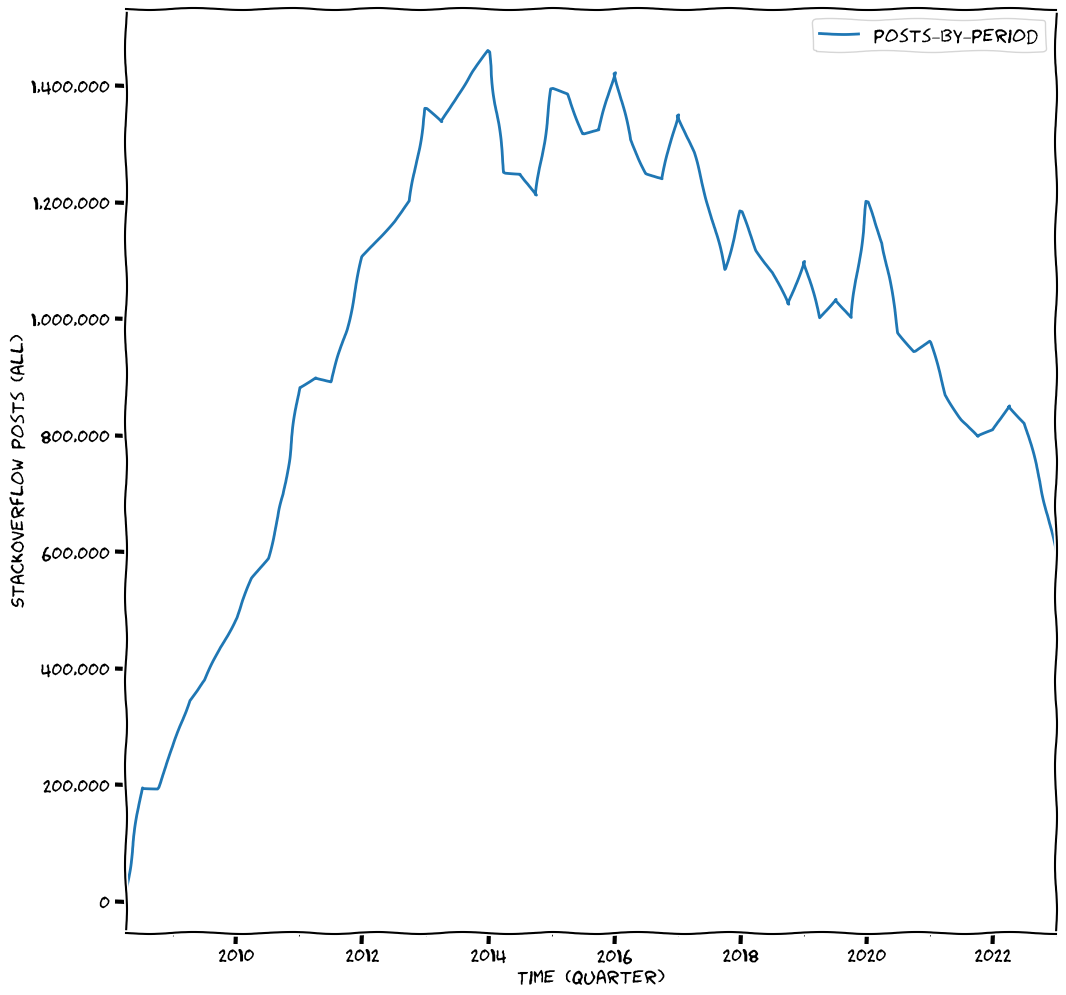

In [2]:
import matplotlib.pyplot as pyplot
from contextlib import closing

from blockchain_stackoverflow.helpers import axis_formatter_with_separator

all_posts_quarterly = pd.read_parquet("post_counts_quarterly.parquet")
all_posts_quarterly = all_posts_quarterly[:pd.Timestamp("2023-05-31")]

with pyplot.xkcd(), closing(pyplot) as fig:
    ax = all_posts_quarterly.plot.line()
    ax.set_xlabel("Time (quarter)")
    ax.set_ylabel("StackOverflow posts (all)")
    ax.get_yaxis().set_major_formatter(axis_formatter_with_separator)
    fig.show()


## Alternative datasets

Some blockchain ecosystems run their own [StackExchange sites](https://en.wikipedia.org/wiki/Stack_Exchange).
A StackExchange site is similar to a StackOverflow programmers Q&A site, but for a particular topic and
is not exclusive to software development.

- Other StackExchange posts represent end-user questions along with software developer questions
- These datasets were not used due to lack of time, as analysis of the data would require manually building tag maps of hundreds of tags
- Including [ethereum.stackexchange.com](https://ethereum.stackexchange.com) software development questions would likely increase Ethereum dominance by a factor of 5x - 10x 
  but might not be a good representation of early adopter interest
- We may publish more research notebooks on these datasets in the future, so please [follow us](https://tradingstrategy.ai/community)

Here is a short overview of different blockchain ecosystem StackExchange sites we are aware of

- [Ethereum](https://ethereum.stackexchange.com) - 60k questions
- [Bitcoin](https://bitcoin.stackexchange.com/) - 30k questions
- [Tezos](https://tezos.stackexchange.com/) - 2k questions
- [Substrate (Polkadot)](https://tezos.stackexchange.com/) - 4k questions
- [EOS](https://eosio.stackexchange.com/) - 2k questions

The StackOverflow-only dataset used in this notebook has ~30k questions.

## More on data and what does it say

We believe StackOverlow represents **mainstream software development interests**. 
Although in decline, the 2023 data should still give a good proximation for this analysis.

For early communities, the interaction usually happens where the community founders are.
They often do not follow or answer questions on StackOverflow. Developers involved
know how to reach the founders and do not post on StackOverflow, as they know 
their questions would go unanswered there.

Furthermore, software development communities, both early and established, are increasingly using other tools to answer questions
- [Github Discussion](https://docs.github.com/en/discussions)
- [Discord Forum Channels](https://docs.github.com/en/discussions)
- [Discourse hosted forums](https://www.discourse.org/)

Because these mediums do not have such good structural data (tagging) or access (data dumps),
analysing software development interests from these sources is much harder.

## Benchmark of unrelated technologies

To understand the nature of the StackOverflow data better, we plot some unrelated technologies and see how their popularity on StackOverflow has developed over time.

- Web frontend development technologies: jQuery, Angular, React, Vue.js, Svelte
- Database technologies: SQL, Firebase, MongoDB

Based on the insights we for example know that most Svelte-related developer interactivity happens on a private Discord questions and answers forum.

In [3]:
# Note: running this cell takes 1 minute to run 
# so you might want to disable it until the final 
# publication

from blockchain_stackoverflow.helpers import create_binned_df_by_tags
from blockchain_stackoverflow.tag_map import OTHER_TAGS

# comparison_df = pd.read_parquet("other-questions.parquet")
# comparison_df = clip_to_data_available_period(comparison_df)

# quaterly_binned = create_binned_df_by_tags(comparison_df, {
#     t: (t, ) for t in OTHER_TAGS
# })

# with pyplot.xkcd():
#     ax = quaterly_binned.plot.line()
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Posts quarterly")

## Researched blockchain technology tags

Here is an overview of tags examined and their lifetime counts.



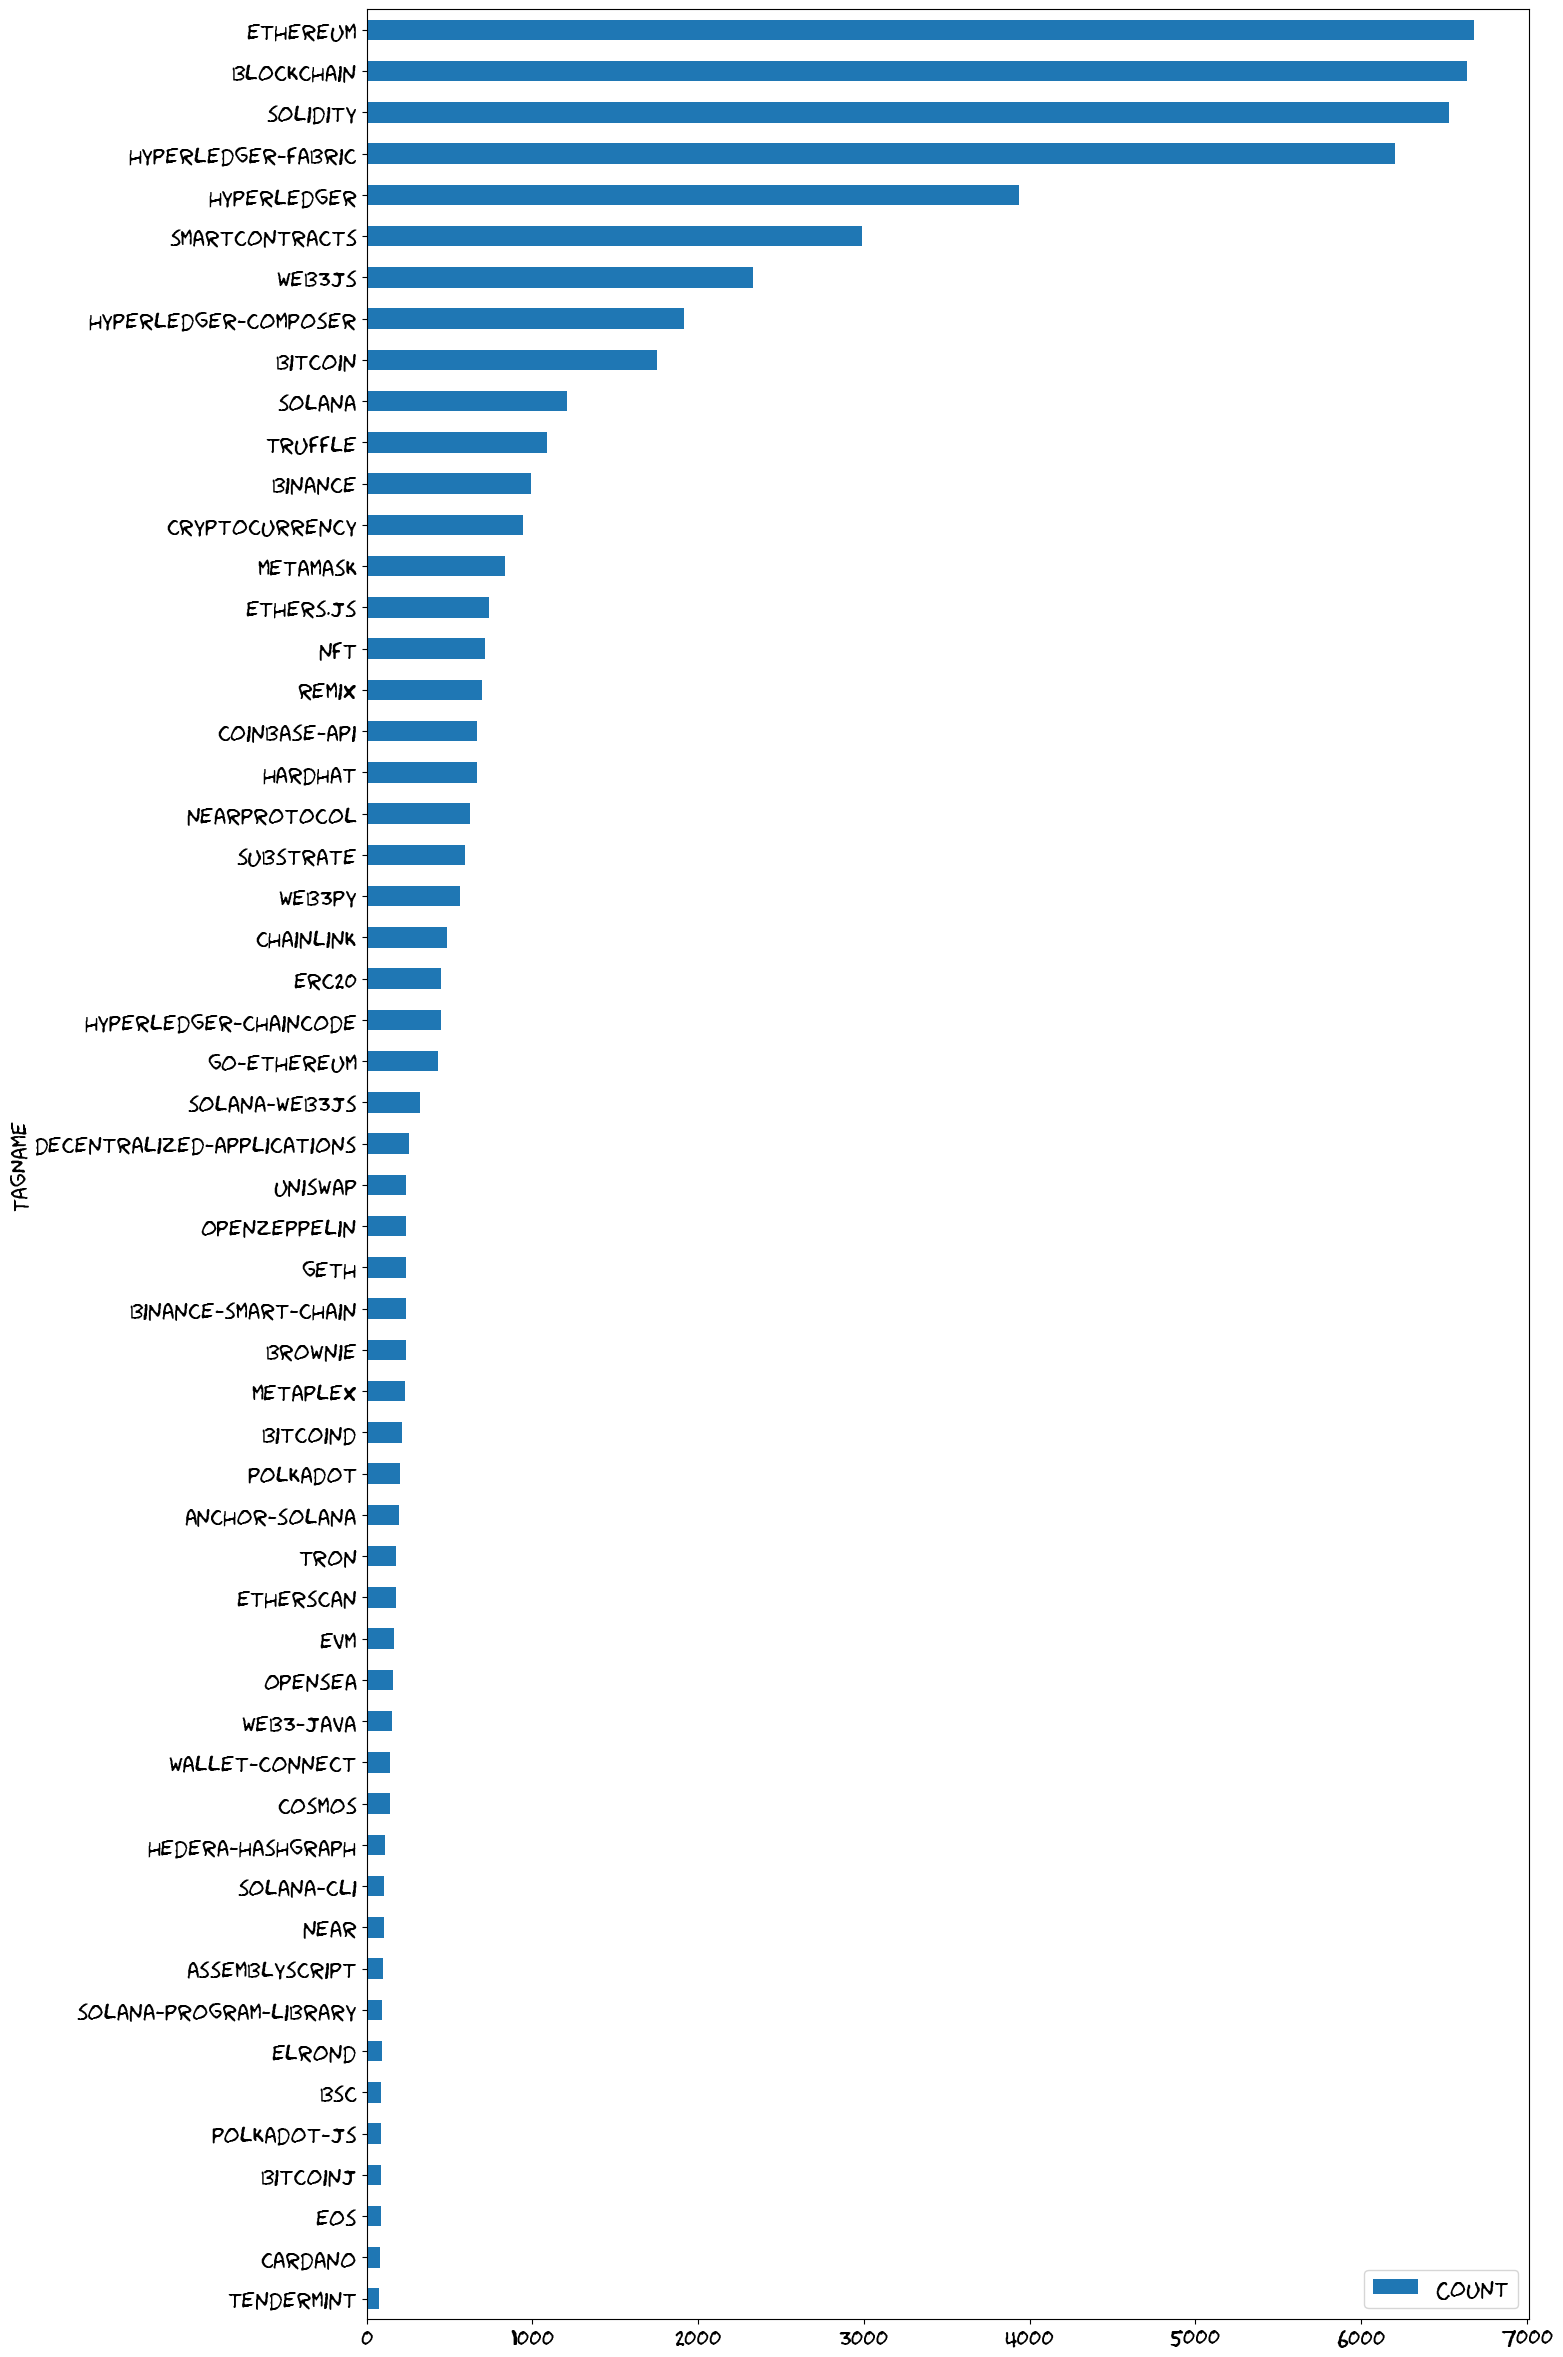

In [4]:
tags_df = pd.read_parquet("tags.parquet")
tags_df = tags_df.sort_values("Count", ascending=True)
tags_df = tags_df.loc[tags_df["Count"] > 75]  # Clip out long tail to limit the chart height

with closing(pyplot) as fig:
    ax = tags_df.plot.barh(x="TagName", y="Count", figsize=(15, 30,))
    fig.show()

## Blockchain questions data

- We have collected ~30k StackOverflow blockchain development-related posts over a decade.
- The first posts around 2010 were Bitcoin-related.
- Since Ethereum mainnet became useable for generic software developers around 2017, Ethereum has dominated blockchain development.

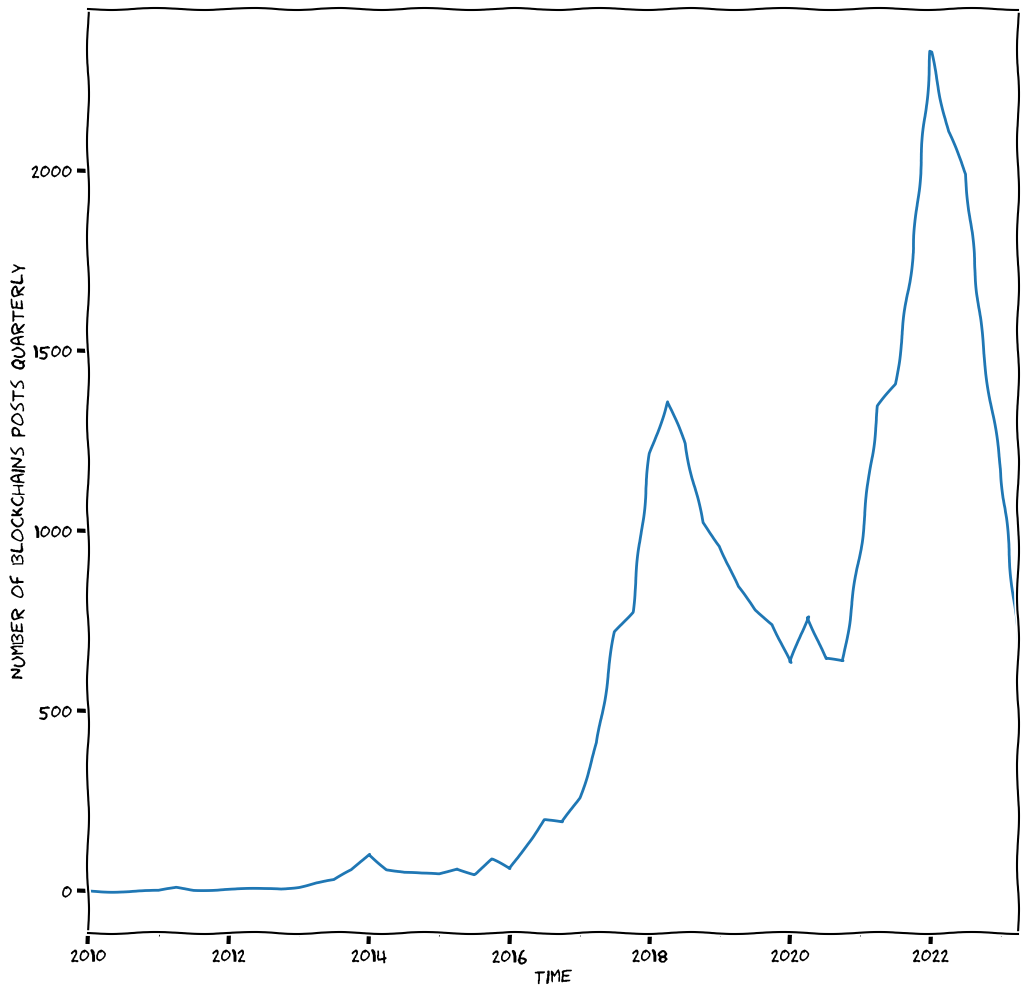

In [5]:
from blockchain_stackoverflow.helpers import bin_to_time

all_blockchain_posts = bin_to_time(df, frequency="QS")

with pyplot.xkcd(), closing(pyplot) as fig:
    ax = all_blockchain_posts.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of blockchains posts quarterly")
    fig.show()
    

## Top blockchains by developer interest

Here we plot the developer popularity of the top four blockchain ecosystems, as inferred from the domain-specific knowledge.

- Ethereum, Bitcoin, Solana and Near Protocol have so much developer interest that it does not make sense
  to plot them on the same scale as the other chains and other chains are plotted below

Note that due to [EVM-compatible clones](https://tradingstrategy.ai/glossary/evm-compatible) it is impossible to distinguish Ethereum questions from e.g., Polygon and BNB SMart Chain questions, so the Ethereum category should be treated as "all EVM blockchains".


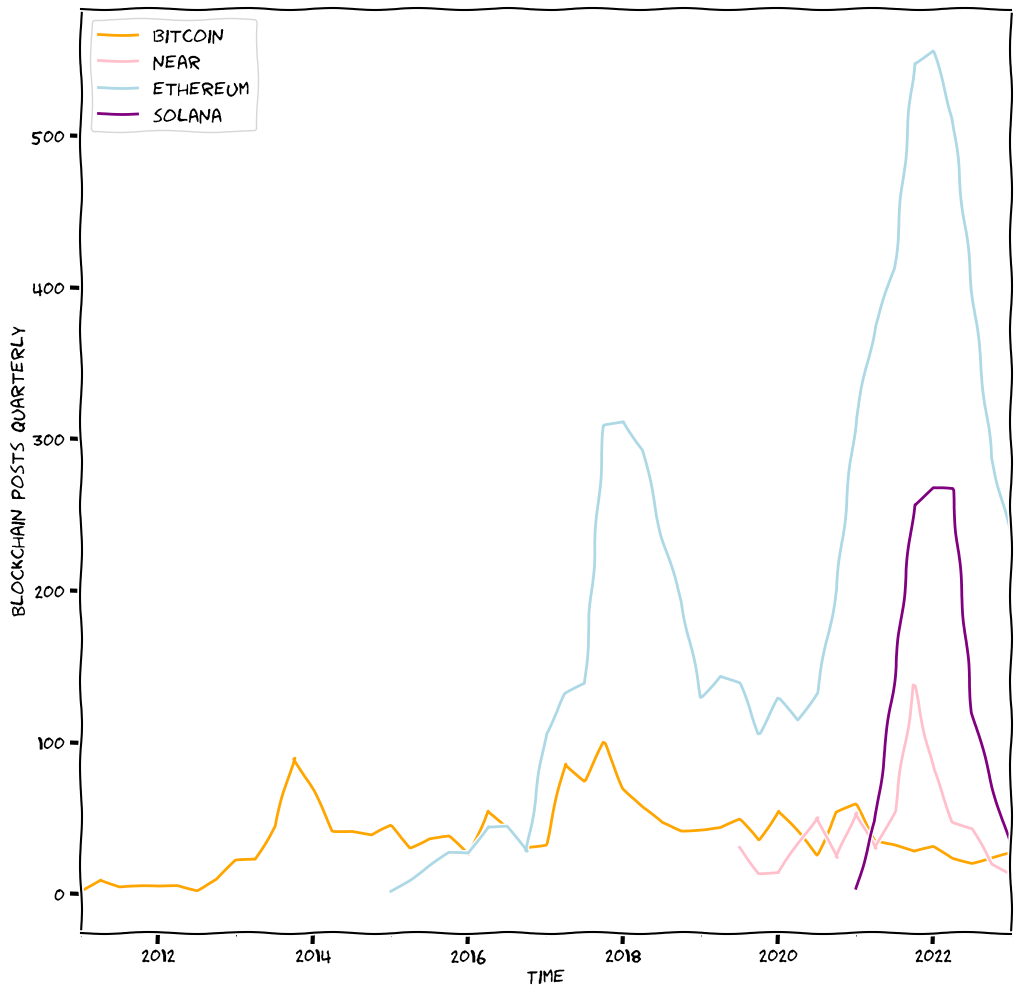

In [6]:


quaterly_binned = create_binned_df_by_tags(df, {
    "bitcoin": ("bitcoin", "bitcoind", "bitcoinj"),
    "near": ("nearprotocol", "near"),
    "ethereum": ("ethereum",),
    "solana": ("solana", "solana-cli"),
})

with pyplot.xkcd(), closing(pyplot) as fig:
    ax = quaterly_binned.plot.line(
        color={
            "bitcoin": "orange",
            "ethereum": "lightblue",
            "solana": "purple",
            "near": "pink",
        }
    )
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Blockchain posts quarterly")
    fig.show()

## Top blockchains by developer interest, adjuted to StackOverflow decline

- Here we present blockchain posts as % of overall posts of StackOverflow.
- This shows any correction for the general trend of StackOverflow decline.
- After adjustment, the blockchain interest downward trend corrects a bit, but this change does not seem to be significant.


In [7]:
# How many % of all SO.com question we are
adjusted_quaterly_binned = quaterly_binned.div(all_posts_quarterly["posts_by_period"], axis="index") * 100
adjusted_quaterly_binned = adjusted_quaterly_binned.loc[pd.Timestamp("2012-01-01"):]

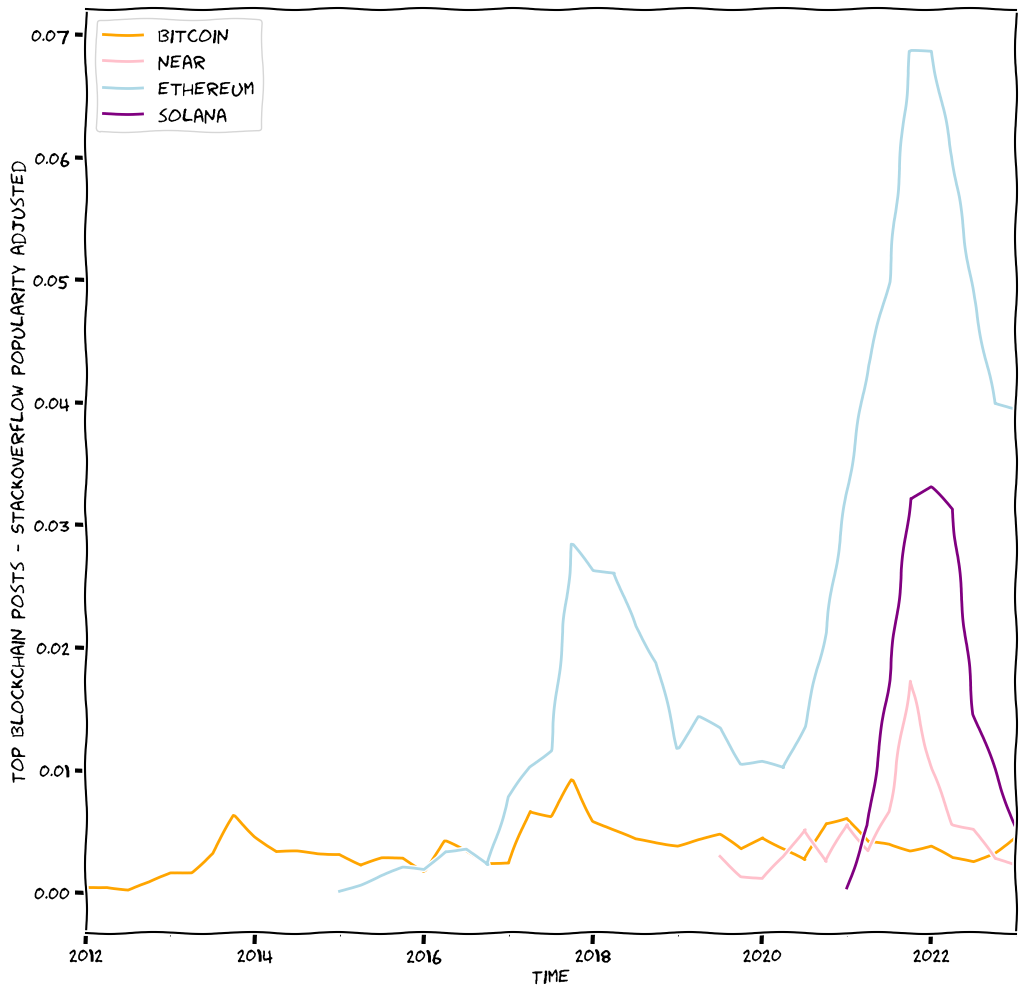

In [8]:
with pyplot.xkcd(), closing(pyplot) as fig:
    ax = adjusted_quaterly_binned.plot.line(
        color={
            "bitcoin": "orange",
            "ethereum": "lightblue",
            "solana": "purple",
            "near": "pink",
        }
    )
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Top blockchain posts - StackOverflow popularity adjusted")
    fig.show()

# Kindlings blockchains

- Here, we analyse tags for blockchains that are gaining traction, have not yet gained traction, or did not gain meaningful traction in the past
- These are plotted on their independent chart, as the Y-axis would be too skewed by the top blockchains.
- As of 2023, **Hedera** seems to have gained traction among developers.
- **Tron**, despite the reputation of its infamous founder, enjoys developer interest - from other contexts we know this to be popular in Asia.
- **Polkadot** made a lot of noise in the 2021 bull run but [has since become quieter](https://www.publish0x.com/cryptoeq/are-polkadot-dot-parachains-dead-xxzkwlw).

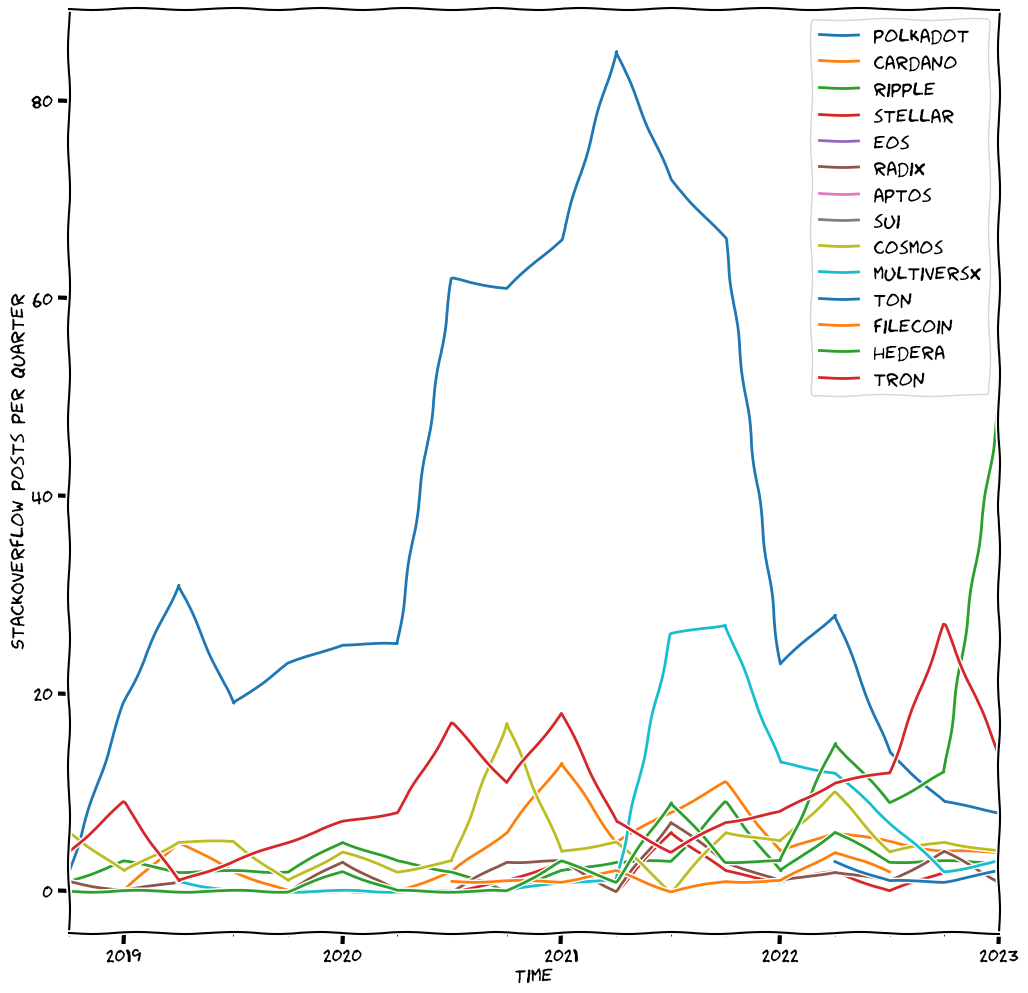

In [9]:

quaterly_binned = create_binned_df_by_tags(df, {
    "polkadot": ("polkadot", "substrate", "polkadot-js"),
    "cardano": ("cardano",),
    "ripple": ("xrp", "rippled"),
    "stellar": ("stellar"),
    "eos": ("eos"),
    "radix": ("scrypto"),
    "aptos": ("aptos"),
    "sui": ("sui"),
    "cosmos": ("cosmos-sdk", "cosmwasm", "tendermint"),
    "multiversx": ("elrond",),
    "ton": ("ton",),
    "filecoin": ("filecoin",),
    "hedera": ("hedera", "hedera-hashgraph",),
    "tron": ("tron",),
})

with pyplot.xkcd(), closing(pyplot) as fig:
    ax = quaterly_binned.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("StackOverflow posts per quarter")
    fig.show()

# Generic blockchain tags

- Here we analyse the trends of generic blockchain development tags.
- These tags cannot be associated with any blockchain or specific technology.

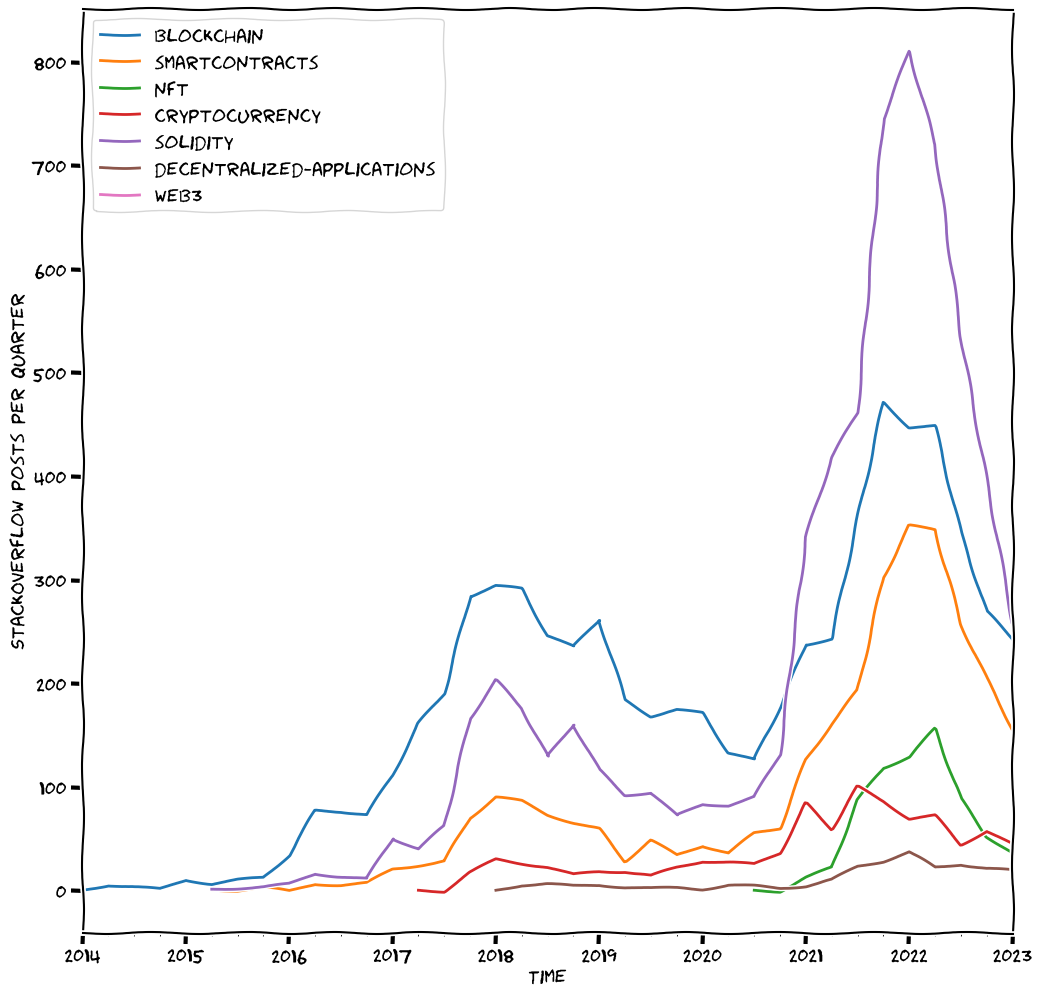

In [10]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "blockchain": ("blockchain",),
        "smartcontracts": ("smartcontracts",),
        "nft": ("nft",),
        "cryptocurrency": ("cryptocurrency",),
        "solidity": ("solidity",),
        "decentralized-applications": ("decentralized-applications",),
        "web3": ("web3",),
    }, 
)

with pyplot.xkcd(), closing(pyplot) as fig:
    ax = quaterly_binned.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("StackOverflow posts per quarter")
    fig.show()

# Deadchains

- Here, we compare blockchains that are likely little relevant today
- After the 2018 bull market, EOS had the best chance to become an alternative for the EVM ecosystem


Based on the domain-specific knowledge, EOS failed not due to technical reasons, but because
  [Block.One, the company behind the original implementation did not allocate or misallocated the capital that was purposed for EOS development](https://.cointelegraph.com/news/eos-urges-to-reject-blockone-settlement).

In [11]:
yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "litecoin": ("litecoin",),
        "stellar": ("stellar",),
        "ripple": ("xrp", "rippled"),
        "diem": ("diem",),
        "dogecoin": ("dogecoin-api",),
        "eos": ("eos",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

with pyplot.xkcd():
    ax = yearly_binned.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("StackOverflow posts per year")

# Centralised exchanges development interest

- We compare centralised exchange API developer questions.
- These questions are related to CEX APIs, automated trading, and trading bots.
- This gives us a reference point in blockchain infrastructure and decentralised ecosystem comparison.
- The X-axis is binned yearly because of low activity on these questions.

In [12]:

yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "binance": ("binance",),
        "coinbase": ("coinbase-api",),
        "kraken": ("kraken.com",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

ax = yearly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per year")



Text(0, 0.5, 'StackOverflow posts per year')

# Binance Smart Chain vs. Ethereum

- By active addresses count, Binance Smart Chain is the most popular EVM-compatible clone chain due to a push from Binance, which has, at the writing of this, 50% CEX market share.
- We do the comparison by some with Binance branded tags against their native Ethereum counterparts.
- However, Binance has not succeeded in creating a vibrant credible ecosystem around it and mostly attracts clone projects or no-substance memecoin projects, which may eventually lead to the downfall of BNB Smart Chain.

In [13]:

quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "erc20": ("erc20",),
        "bep20": ("bep20",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Uniswap vs. PancakeSwap

- We compare the developer interest of leading DEXes of Ethereum and Binance Smart Chain ecosystems.
- Uniswap is the leading decentralised exchange.
- Uniswap is Ethereum-centric, whereas PancakeSwap is Binance Smart Chain-centric.
- PancakeSwap is the only Uniswap competitor with some meaningful mainstream developer ecosystem in 2023.

In [14]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "pancakeswap": ("pancakeswap",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Fungible vs. non-fungible tokens

- Here we compare the developer interest of NFTs against value transfer tokens.
- This comparison is not specific to any particular blockchain.

In [15]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "nft-related": ("nft", "metaplex", "opensea"),
        "token-related": ("erc20", "bep20", "uniswap"),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# JavaScript vs. Python vs. other programming languages

- Compare Ethereum integration libraries for various major programming languages
    - JavaScript
    - Python
    - Java
    - Dart
    - Go
- We see how the top two languages, JavaScript and Python, have integration library-related questions


In [16]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "javascript-integration": ("web3js", "ethers.js", "wagmi"),
        "python-integration": ("web3py", "brownie"),
        "java-integration": ("web3-java",),
        "dart-integration": ("web3dart",),
        "go-integration": ("go-ethereum",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# JavaScript Web3 frontend integration libraties

- JavaScript is the most popular programming language in the world.
- Multiple JavaScript frameworks exist to integrate blockchain-specific functionality to both the frontend and backend of web applications.
- Here we plot what is the popularity of different Web3 frontend integration libraries for Ethereum.

In [17]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "wagmi": ("wagmi",),
        "web3js": ("web3js",),
        "ethers.js": ("ethers.js",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

/Users/moo/Library/Caches/pypoetry/virtualenvs/blockchain-stackoverflow-TYKATsCO-py3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/moo/Library/Caches/pypoetry/virtualenvs/blockchain-stackoverflow-TYKATsCO-py3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/moo/Library/Caches/pypoetry/virtualenvs/blockchain-stackoverflow-TYKATsCO-py3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


Text(0, 0.5, 'StackOverflow posts per quarter')

# New smart contract programming languages

- How new smart contract programming languages are coming along
- We do not benchmark against Solidity as it would skew the axes
- With the launch of Aptos and Sui chains, originally developed for Facebook's Diem blockchain, Move is gaining in popularity this year.
- AssemblyScript is used outside smart contracts, but it saw a blink of a popularity on Near blockchain.

In [18]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "move": ("move-lang",),
        "scrypto": ("scrypto",),
        "vyper": ("vyper",),
        "assemblyscript": ("assemblyscript",)
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Smart contract framework popularity comparison

- Here we compare the popularity of different smart contract development frameworks for Ethereum.
- Foundry is taking over from Truffle and Hardhat.
- Foundry is too new to be included here.
- Foundry support is mostly kindling support on the community Telegram chat.
- Brownie is now unmaintained and being replaced by Ape.
- Remix is included here, even though it's web IDE and not a framework per se.

In [19]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "truffle": ("truffle",),
        "hardhat": ("hardhat",),
        "brownie": ("brownie",),
        "openzeppelin": ("openzeppelin",),
        "remix": ("remix",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Solana tags breakdown

- Here we examine what are the various Solana question sub-tags and how are they doing.



In [20]:
sol_sub_tags = [
    "solana-cli",
    "solana-transaction-instruction",
    "solana-program-library",
    "solana-web3js",
    "anchor-solana",
    "solana-py",    
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in sol_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Binance breakdown

- Here we examine popularity of different BNB Smart Chain related tags.

In [21]:
bsc_sub_tags = [
    "bep20",
    "bsc",
    "binance-smart-chain",
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in bsc_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Wallet related

- While MetaMask is not a programming interface, but a single implementation, 
  developers tag their questions with "MetaMask" as they do not correctly understand what a blockchain wallet is.
- New, mobile-friendly, WalletConnect interface standard has been in progress since 2021. 
- WalletConnect is one of the blockchain developer interests that is increasing today.

In [22]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "metamask": ("metamask",),
        "wallet-connect": ("wallet-connect",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Decentralised application (Dapp) related

- Here we benchmark some popular Dapps and protocols that are not blockchains themselves.
- OpenSea is included here, although it is not a truly decentralised application, open source and thus does not have a developer community.


In [23]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "chainlink": ("chainlink",),
        "wallet-connect": ("wallet-connect",),
        "opeasea": ("opeasea",),
        "thegraph": ("thegraph",),
        "gnosis-safe": ("gnosis-safe",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

Text(0, 0.5, 'StackOverflow posts per quarter')

# Private or public blockchain

- Hyperledger is the most well-known implementation used on private blockchains.
- Private blockchain peaked in 2018 and never recovered - enterprises are now looking to implement their use cases on public blockchains, subnets or similar.

In [24]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "ethereum": ("ethereum",),
        "hyperledger": ("hyperledger", "hyperledger-fabric",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")


Text(0, 0.5, 'StackOverflow posts per quarter')

## Ethereum vs. Hyperledger vs. all blockchain questions-to-answers ratio

- We compare the questions-to-answers ratio of different technologies.
- A good questions-to-answers ratio is a sign of a healthy open-source community. Lower is better: it means more questions get an answer.
- We check how well Hyperanswer to questions compared to the more community-oriented public blockchain folks.
- We compare all blockchain questions, Ethereum and Hyperledger 

Some speculation about the results:

- As discussed earlier, StackOverflow is in decline and we can see this as well
  by having more and more questions going unanswered. Either questions are low quality
  (written unprofessionally) or people have stopped bothering to answer for other reasons.
- We see the quality of both Ethereum and Hyperledger communities degrading over time.
- This is likely due to more low-skilled developers entering the industry,
  whereas early on the community consists of professional developers only.
- We also see spikes around the launches of Bitcoin and Ethereum communities,
  when the community was small and consisted only of domain experts.


In [25]:
from blockchain_stackoverflow.helpers import bin_to_time_with_answers, get_posts_by_tags

hyperledger = get_posts_by_tags(df, ("hyperledger", "hyperledger-fabric",))
ethereum = get_posts_by_tags(df, ("ethereum",))

hyperledger_binned = bin_to_time_with_answers(hyperledger)
ethereum_binned = bin_to_time_with_answers(ethereum)
overall = bin_to_time_with_answers(df)

answer_ratios = pd.DataFrame({
    "ethereum": ethereum_binned["answer_to_posts_ratio"],
    "hyperledger": hyperledger_binned["answer_to_posts_ratio"],
    "all blockchain": overall["answer_to_posts_ratio"],
})

ax = answer_ratios.plot.line()

# Community developer relations health indicator

- We check the all-time questions-to-answers ratio for every tag we have collected.
- We sort tags by healthiest (most answers to questions) to unhealthy (questions go without answers).
- We do not do time analysis for trends, but just take the lifetime value for each tag.
The Hedera Hashgraph community seems to be doing an excellent job answering the questions.
- Some blue chip projects like **Uniswap**, **WalletConnect** and **FileCoin** have low scores, indicating that most questions go unanswered. These projects should likely invest more in basic documentation and developer support.

In [26]:

from blockchain_stackoverflow.tag_map import INTERESTING_TAGS

# tag -> answer ratio mappings
ratios = pd.Series(dtype="float")

for tag in INTERESTING_TAGS:
    posts = get_posts_by_tags(df, (tag,))
    question_count = len(posts)
    if question_count == 0:
        print(f"{tag} lacks any questions")
        continue
    answer_count = posts["AnswerCount"].sum()
    ratios[tag] = answer_count / question_count

ratios = ratios.sort_values()
ax = ratios.plot.barh(figsize=(15, 30,))



web3 lacks any questions


## Conclusions

- Ethereum and its clones are dominating the developer interest, and although other ecosystems are significantly smaller, they exist.
- Nobody wants to develop on Bitcoin.
- Based on our dataset, although blockchain developer interest is in decline, it is still healthy and seems to follow market cycles.
- This could be because bull market runs attract developers who are mostly motivated by money and high salaries.
- There are some specific technologies like WalletConnect and Hedera Hashgraph that are seeing increased developer interest today.

For any updates and follow-ups, [subscribe](https://tradingstrategy.ai/community) to the newsletter](https://tradingstrategy.ai/community) or [follow on Twitter](https://tradingstrategy.ai/community).

For any questions, [come to Trading Strategy Discord](https://discord.com/invite/en8tW6MDtw).